
Cluster 1
Age
	 Mean = 34.76
	 Minimum = 21.00
	 Maximum = 68.00
Income
	 Mean = 181040.57
	 Minimum = 136638.00
	 Maximum = 309364.00

Cluster 2
Age
	 Mean = 32.15
	 Minimum = 18.00
	 Maximum = 54.00
Income
	 Mean = 105302.13
	 Minimum = 35832.00
	 Maximum = 158683.00

Cluster 3
Age
	 Mean = 56.95
	 Minimum = 40.00
	 Maximum = 76.00
Income
	 Mean = 148474.36
	 Minimum = 51882.00
	 Maximum = 231992.00


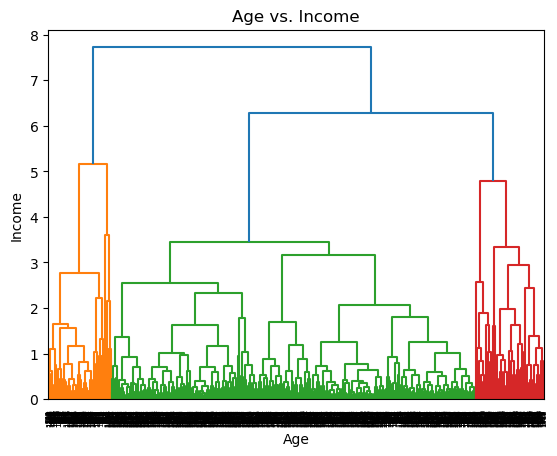

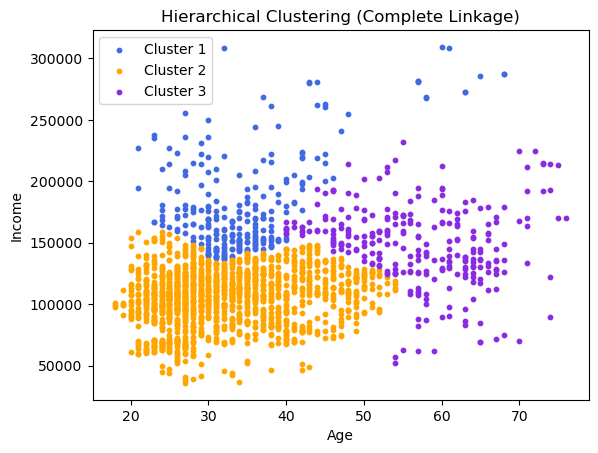

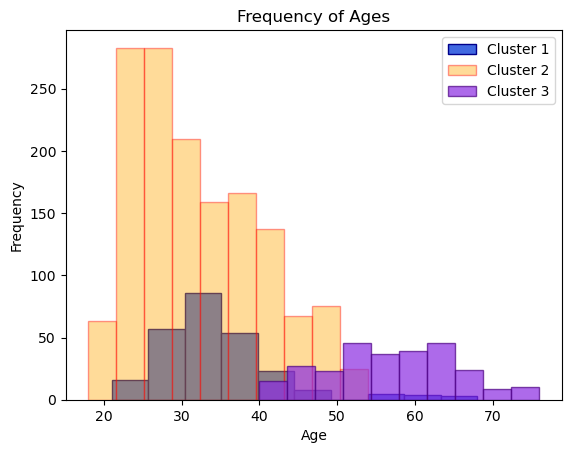

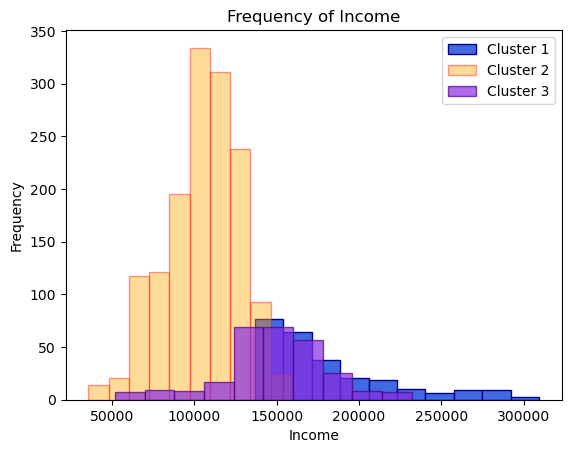

In [1]:
#https://www.kaggle.com/datasets/dev0914sharma/customer-clustering

import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Customer_data.csv")
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import warnings
warnings.filterwarnings('ignore')

# print('\nNumber of missing values:')
# for col in data.columns:
#     print('\t%s: %d' % (col, data[col].isna().sum()))
# data = data.dropna()
# print('\nNumber of duplicate rows = %d' % (data.duplicated().sum()))
# data = data.drop_duplicates()

data = data.drop(['ID', 'Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size'],axis=1)

plt.scatter(x=data["Age"], y=data["Income"], s=10)
plt.title('Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')

scaler = StandardScaler()
dataScaled = scaler.fit_transform(data)

completeClustering = linkage(dataScaled, method="complete", metric="euclidean")
dendrogram(completeClustering)
data['Cluster'] = fcluster(completeClustering, t=6, criterion='distance')

cluster1 = data.loc[data["Cluster"] == 1]
cluster2 = data.loc[data["Cluster"] == 2]
cluster3 = data.loc[data["Cluster"] == 3]

plt.figure()
plt.scatter(x=cluster1[["Age"]], y=cluster1[["Income"]], label='Cluster 1', s=10, color='royalblue')
plt.scatter(x=cluster2[["Age"]], y=cluster2[["Income"]], label='Cluster 2', s=10, color='orange')
plt.scatter(x=cluster3[["Age"]], y=cluster3[["Income"]], label='Cluster 3', s=10, color='blueviolet')
plt.legend()
plt.title('Hierarchical Clustering (Complete Linkage)')
plt.xlabel('Age')
plt.ylabel('Income')

plt.figure()
plt.hist(cluster1.iloc[:, 0], label='Cluster 1', edgecolor='darkblue', color='royalblue')
plt.hist(cluster2.iloc[:, 0], label='Cluster 2', alpha=.4, edgecolor='red', color='orange')
plt.hist(cluster3.iloc[:, 0], label='Cluster 3', alpha=.7, edgecolor='indigo', color='blueviolet')
plt.legend()
plt.title('Frequency of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.figure()
plt.hist(cluster1.iloc[:, 1], label='Cluster 1', edgecolor='darkblue', color='royalblue')
plt.hist(cluster2.iloc[:, 1], label='Cluster 2', alpha=.4, edgecolor='red', color='orange')
plt.hist(cluster3.iloc[:, 1], label='Cluster 3', alpha=.7, edgecolor='indigo', color='blueviolet')
plt.legend()
plt.title('Frequency of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

print("\nCluster 1")
for col in cluster1.columns[:-1]:
    print(col)
    print('\t Mean = %.2f' % cluster1[col].mean())
    print('\t Minimum = %.2f' % cluster1[col].min())
    print('\t Maximum = %.2f' % cluster1[col].max())

print("\nCluster 2")
for col in cluster2.columns[:-1]:
    print(col)
    print('\t Mean = %.2f' % cluster2[col].mean())
    print('\t Minimum = %.2f' % cluster2[col].min())
    print('\t Maximum = %.2f' % cluster2[col].max())
    
print("\nCluster 3")
for col in cluster3.columns[:-1]:
    print(col)
    print('\t Mean = %.2f' % cluster3[col].mean())
    print('\t Minimum = %.2f' % cluster3[col].min())
    print('\t Maximum = %.2f' % cluster3[col].max())